<h1> Deconstructing Stats </h1>

<h2> Covariance </h2>

<h3>short covariance from scratch </h3>

In [41]:
import numpy as np
from numpy import mean, std, var
#economic grouth x
x = np.array([2.1, 2.5,4.0,3.6])

#y SnP
y= np.array([8,12,14,10])

n = len(x)

<p><span style="color:blue"> covariance = sum of multiplication of distances from mean of x and y divided by N-1 </span>

\begin{equation} \frac{ \sum{(x -  \hat{x}} ) (y - \hat{y}) } {N-1}                \end{equation}

In [42]:
print("sum of product of x,y differences from mean: {:0.2f} ".format( sum( (x - mean(x)) * (y - mean(y)))))
print("n-1: {:}".format(n-1))
covar=      sum( (x - mean(x)) * (y - mean(y))) / (n-1)
covar

sum of product of x,y differences from mean: 4.60 
n-1: 3


1.5333333333333332

In [43]:
print(np.cov(x,y))
np.cov(x,y)[1,0]

[[0.80333333 1.53333333]
 [1.53333333 6.66666667]]


1.5333333333333332

In [44]:
np.var(x,ddof=1)

0.8033333333333333

In [24]:
xStd= x.std(ddof=1) # degrees of freedom 1 / divisor is N - 1 for sample
yStd= std(y, ddof=1)

<p> <span style="color:purple"> write the covariance `covar1` formula from scratch for A and B   </span>

In [45]:
A = np.array([4,5,6,6,7])
B = np.array([30,34,33,37,37])

In [46]:
covar1=      sum((A - mean(A)) * (B - mean(B))) / (len(A)-1)
print(covar1)
np.cov(A,B)

2.85


array([[1.3 , 2.85],
       [2.85, 8.7 ]])

In [27]:
np.cov(A,B)[1,0]

2.85

<h2> Correlation </h2>

<p><span style="color:blue"> covariance  divided by multiplication of sdev of x and sdev of y </span>

In [47]:
#cont cnt cont
xStd = np.std(x, ddof=1)
yStd=np.std(y, ddof=1)
r = covar / (xStd * yStd) # or covar / math.sqrt(xVar *yVar)
r

0.662573882203029

In [48]:
r



0.662573882203029

In [30]:
#another from scratch formula
r_ = sum( (x-mean(x)) * (y-mean(y))) /( np.sqrt( sum((x-mean(x))**2)    *  sum((y-mean(y))**2)      ))
r_

0.6625738822030289

In [31]:
#numpy correlation
np.corrcoef(x,y)
np.corrcoef(A,B)[1,0]

0.8474489726663251

<p> <span style="color:purple"> given x and y compute `r1` correlation from scratch </span>

In [49]:
x = np.array([2.1, 2.5,4.0,3.6])
#y SnP
y= np.array([8,12,14,10])
n = len(x)


`np.std(x , ddof=1)` standard dev of a population

In [33]:
xStd = np.std(x, ddof=1)
yStd=np.std(y, ddof=1)
covar=      sum( (x - mean(x)) * (y - mean(y)) ) / (n-1)
r1 = covar / (xStd*yStd)
r1


0.662573882203029

<h2> the Art of Sampling </h2>

<h3> basic sampling with numpy </h3>

In [34]:
import numpy as np
popul = ['a','b','c', 'd','e']

`np.random.choice(population, _SampleSize_ , replace=T/F)`

In [35]:
sample = np.random.choice(popul, 2, replace=False)
print (sample)

['a' 'b']


In [36]:
popul2=[x for x in range(0,1000)]
sample2 =np.random.choice(popul2,10, replace =False) #True by default
sample2

array([534, 349, 665, 956,  72, 376, 849, 618, 530, 395])

<p> <span style="color:purple">sample 3 members of the population in sample 3 </span>

In [37]:

popul3=[x for x in range(10,101,10)]
popul3

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [38]:
np.random.seed(12)
sample3=np.random.choice(popul3,3,replace=False)
sample3

array([60, 90, 80])

<h4>Sampling simulator with Pandas </h4>

In [50]:
import pandas as pd

die = pd.DataFrame([1,2,3,4,5,6])
#print(die)
sum_of_dice = die.sample(2,replace=True).sum().iloc[0]
print('Sum of dice is', sum_of_dice)  

Sum of dice is 11


In [ ]:
<p> <span style="color:purple">replace the sum of dice parameter with 4 </span>

In [51]:
np.random.seed(1)

In [ ]:
sum_of_dice4= die.sample(4,replace=True).sum().loc[0]
print('sum of 4 dice :', sum_of_dice)

do 100 trials

In [ ]:
trials = 100
result = [die.sample(2, replace = True).sum().loc[0] for i in range(trials)]
result[:20]

<h2>Generate synthetic data </h2>

In [ ]:
import scipy.stats as stats

`scipy.stats.norm(mean, std).rvs((numR, numC))` specify mean and std

In [ ]:
stats.norm(0,1).rvs((5,2))
stats.norm(1,1).rvs((5,2))

`concatenate( (array1, array2 ), axis=num)`

In [ ]:
np.concatenate( (stats.norm(0,1).rvs((5,2)),( stats.norm(1,1).rvs((5,2)) ) ), axis=0 )

In [ ]:
def generate_synth_data(n=50):
    '''create two sets of point for bivariate distribution , n repetitions'''
    points = np.concatenate( ( ss.norm(0,1).rvs((n,2)),( ss.norm(1,1).rvs((n,2)) ) ), axis=0 )
    outcomes = np.concatenate( ( np.repeat(0,n), np.repeat(1,n) ) )
    return  (points, outcomes)

In [ ]:
n=5
(points, outcomes) =generate_synth_data(n)
print(points)
print(outcomes)


<h4>plotting </h4>

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(points[:n,0], points[:n,1], 'ro')
plt.plot(points[n:,0], points[n:,1], 'bo')
plt.savefig("bivardata.pdf")

<p> <span style="color:purple">generate a group1 (10*2) array of mean,std=5,2 and another of 7.1.5  </span>

In [ ]:
group1 = stats.norm(5,2).rvs(10,2)
group2 = stats.norm(7,1.5).rvs(10,2)
group2

<h2>From mean to correlation from scratch (native python) </h2>

In [52]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

In [53]:
import matplotlib.pyplot as plt
plt.hist(num_friends,bins=20)
plt.title("Histogram of number of friends in social media")
plt.xlabel("friends per user")

Text(0.5,0,'friends per user')

In [54]:
#basic messures
num_points = len(num_friends)
smalest = min(num_friends)
largest = max(num_friends)


<h3> Central Tendencies </h3>

<h4> Mean </h4>

In [55]:
# this isn't right if you don't from __future__ import division
def mean(x):
    return sum(x) / len(x)
mean(num_friends)

7.333333333333333

<h4> Median </h4>

In [56]:
def median(v):
    """finds the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    if n % 2 == 1:
        # if odd, return the middle value
        return sorted_v[midpoint]
    else:
        # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2
median(num_friends)

6.0

<h4> Quantile </h4>

In [57]:
def quantile(x, p):
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]
print(quantile(num_friends,0.4))
quantile(num_friends,0.97)


5


21

<h4> Mode </h4>

In [58]:
from collections import Counter
def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() #.iteritems in python 2.7
    if count == max_count]
mode (num_friends)

[6, 1]

<h3> Dispersion </h3>

<h4>Range
</h4>

In [59]:
# "range" already means something in Python, so we'll use a different name
def data_range(x):
    return max(x) - min(x)

<h4>Variance </h4>

In [60]:
def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)
    returns list of distances from the mean"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)
variance(num_friends) # 81.54

81.54351395730716

<h4>Standard Deviation </h4>

In [61]:
import math
def standard_deviation(x):
    return math.sqrt(variance(x))
standard_deviation(num_friends) # 9.03

9.03014473623248

<h4>Interquartile Range</h4>

In [57]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)
interquartile_range(num_friends) # 6

6

<h3>Covariance </h3>

In [98]:
def covariance (x,y):
    n= len(x)
    return dot ( de_mean(x), de_mean(y)) / (n-1)
print ("covariance: {:.2f}".format(covariance(num_friends , daily_minutes) ))

covariance: 22.43


<h3> Correlation </h3>

In [99]:
def correlation (x, y):
    stdev_x = standard_deviation (x)
    stdev_y = standard_deviation (y)
    if stdev_x >0 and stdev_y >0:
        return covariance(x,y) / (stdev_x * stdev_y)
    else: 
        return 0
print( "correlation: {:.2f}".format(correlation(num_friends, daily_minutes))) # 0.25

correlation: 0.25


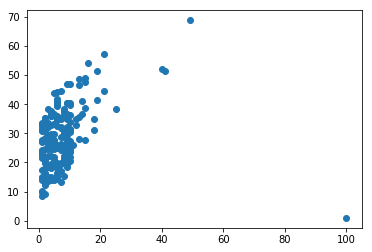

In [83]:
plt.scatter(num_friends, daily_minutes)

12.5

<h2> A demo with CR consumption and investment data as % of GDP </h2>

<h3> extracting data from csv </h3>

In [74]:
crCons=[]
crInv=[]
import csv
filename = "crinvcons.csv"
cr= open(filename, newline='')
crReader= csv.reader(cr)
header= next(crReader)
for row in crReader:
    crCons.append(float(row[0]))
    crInv.append(float(row[1]))
print(crCons[:3])
print(crInv[:3])

[70.7, 71.3, 71.9]
[11.8, 12.6, 14.4]


<h3>central tendencies </h3>

In [86]:
print("data for crCons, mean , median")
print("{:.2f}, {:.2f}".format(mean(crCons), median(crCons)))
print("data for crInv, mean , median")
print("{:.2f}, {:.2f}".format(mean(crInv), median(crInv)))


data for crCons, mean , median
67.70, 66.80
data for crInv, mean , median
15.51, 14.80


<h3>dispersion </h3>

In [96]:
print("range, stdev , variance for crCons")
print("{:.2f}, {:.2f}, {:.2f}".format(data_range(crCons), standard_deviation(crCons), variance(crCons) ))
print("range, stdev , variance for crInv")
print("{:.2f}, {:.2f}, {:.2f}".format(data_range(crInv), standard_deviation(crInv), variance(crInv) ))

range, stdev , variance for crCons
14.70, 4.32, 18.70
range, stdev , variance for crInv
10.10, 2.76, 7.60


<h3>Covar and Correlation</h3>

In [101]:
print("covar of cons and inv: {:.2f}".format(covariance(crCons, crInv)))
print("covar matrix:")
print(np.cov(crCons,crInv))

covar of cons and inv: -8.38
covar matrix:
[[18.70499446 -8.37831672]
 [-8.37831672  7.59733112]]


In [102]:
print("correlation of cons and inv : {:.2f}".format(correlation (crCons, crInv)))

correlation of cons and inv : -0.70


Text(0,0.5,'inversion / GDP')

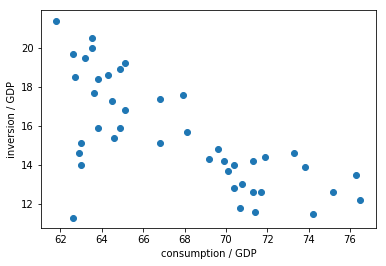

In [107]:
plt.scatter(crCons,crInv)
plt.xlabel("consumption / GDP")
plt.ylabel("inversion / GDP")